<a href="https://colab.research.google.com/github/Olgera/EDA/blob/main/excel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import random

In [ ]:
import pandas as pd
import numpy as np

!pip install numpy --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.9/60.9 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.3/16.3 MB 52.9 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cupy-cuda12x 12.2.0 requires numpy<1.27,>=1.20, but you have numpy 2.1.2 which is incompatible.
gensim 4.3.3 requires numpy<2.0,>=1.18.5, but you have numpy 2.1.2 which is incompatible.
langchain 0.3.4 requires numpy<2,>=1; python_version < "3.12", but you have numpy 2.1.2 which is incompatible.
matplotlib 3.8.0 requires numpy<2,>=1.21, but you have numpy 2.1.2 which is incompatible.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.1.2 which is incompatible.
pytensor 2.25.5 requires numpy<2,>=1.17.

**Задание 1.** Подготовка отчета по конкурентам. Три индивидуальных предпринимателя (Иванов, Петров и Сидоров) продают чехлы и другие аксессуары для смартфонов на Wildberries. В файле «Тестовое задание_Младший аналитик.xlsx»., на листе «Задание1» представлена выборка, включающая номенклатуры товаров трех индивидуальных предпринимателей. Пользуясь отчетами о продажах, представленными на других листах, для списка номенклатур с листа «Задание1», выполните следующие задания:

1.0.	 Импорт всех необходимых данных.

In [ ]:
df_list_test1 = pd.read_excel('Данные для задания Python.xlsx', sheet_name="Задание1")
df_list_ivanov = pd.read_excel('Данные для задания Python.xlsx', sheet_name="Отчет о продажах ИП Иванов", header=1)
df_list_petrov = pd.read_excel('Данные для задания Python.xlsx', sheet_name="Отчет о продажах ИП Петров", header=1)
df_list_sidorov = pd.read_excel('Данные для задания Python.xlsx', sheet_name="Отчет о продажах ИП Сидоров", header=1)
df_list_price = pd.read_excel('Данные для задания Python.xlsx', sheet_name="Себестоимость и Цена до скидки")
df_list_dir = pd.read_excel('Данные для задания Python.xlsx', sheet_name="Справочник")

In [ ]:
# Переименовывание столбцов
df_list_ivanov.rename(columns = {'шт':'Поступления, шт','себестоимость':'Поступления, себестоимость','шт.1':'Заказано, шт','себестоимость.1':'Заказано, себестоимость'}, inplace = True)
df_list_petrov.rename(columns = {'шт':'Поступления, шт','себестоимость':'Поступления, себестоимость','шт.1':'Заказано, шт','себестоимость.1':'Заказано, себестоимость'}, inplace = True)
df_list_sidorov.rename(columns = {'шт':'Поступления, шт','себестоимость':'Поступления, себестоимость','шт.1':'Заказано, шт','себестоимость.1':'Заказано, себестоимость'}, inplace = True)

1.1. Определить к какому ИП относится номенклатура.
Примечание: если номенклатура не встречается ни в одном из отчетов, в поле «ИП» поставить прочерк.


In [ ]:
df_list_test1['ИП'] = np.where(df_list_test1['Номенклатура'].isin(df_list_ivanov['Номенклатура']), 'Ivanov', '-')
df_list_test1['ИП'] = np.where(df_list_test1['Номенклатура'].isin(df_list_petrov['Номенклатура']), 'Petrov', df_list_test1['ИП'])
df_list_test1['ИП'] = np.where(df_list_test1['Номенклатура'].isin(df_list_sidorov['Номенклатура']), 'Sidorov', df_list_test1['ИП'])
df_list_test1

,Номенклатура,ИП,"Заказы, шт.","Выручка, руб.","Прибыль, руб.","Рентабельность, %"
0,22740348,Ivanov,NaN,NaN,NaN,NaN
1,27708426,Ivanov,NaN,NaN,NaN,NaN
2,35217579,Ivanov,NaN,NaN,NaN,NaN
3,74417961,Petrov,NaN,NaN,NaN,NaN
4,22740351,Ivanov,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
6618,222565821,-,NaN,NaN,NaN,NaN
6619,222574341,-,NaN,NaN,NaN,NaN
6620,222575259,-,NaN,NaN,NaN,NaN
6621,222564462,-,NaN,NaN,NaN,NaN


1.2. Посчитать количество заказов по каждой номенклатуре.
Дополнительные сведения для выполнения задания:
- данные по заказам представлены в Отчетах о Продажах по трем ИП в столбцах «Заказано, шт.»;
- если ни в одном отчете о продажах нет информации по номенклатуре, то количество заказов по такой номенклатуре равняется нулю;
- так как отчет может содержать несколько строк по одной номенклатуре, важно считать сумму заказов по всем строкам, в которых указана номенклатура.


In [ ]:
df_list_test1['Заказы, шт.'] = 0

df_list_test1 = pd.merge(df_list_test1, df_list_ivanov.groupby('Номенклатура')['Заказано, шт'].sum(), how ='left', on ='Номенклатура')
df_list_test1['Заказы, шт.'] = np.where(df_list_test1['ИП'] == 'Ivanov', df_list_test1['Заказано, шт'], df_list_test1['Заказы, шт.'])
df_list_test1 = df_list_test1.drop(columns=['Заказано, шт'], axis=1)

df_list_test1 = pd.merge(df_list_test1, df_list_petrov.groupby('Номенклатура')['Заказано, шт'].sum(), how ='left', on ='Номенклатура')
df_list_test1['Заказы, шт.'] = np.where(df_list_test1['ИП'] == 'Petrov', df_list_test1['Заказано, шт'], df_list_test1['Заказы, шт.'])
df_list_test1 = df_list_test1.drop(columns=['Заказано, шт'], axis=1)

df_list_test1 = pd.merge(df_list_test1, df_list_sidorov.groupby('Номенклатура')['Заказано, шт'].sum(), how ='left', on ='Номенклатура')
df_list_test1['Заказы, шт.'] = np.where(df_list_test1['ИП'] == 'Sidorov', df_list_test1['Заказано, шт'], df_list_test1['Заказы, шт.'])
df_list_test1 = df_list_test1.drop(columns=['Заказано, шт'], axis=1)

#df_list_test1['Заказы, шт.'] = [df_list_ivanov.loc[df_list_ivanov['Номенклатура'] == x, 'Заказано, шт'].sum() if df_list_test1['ИП'] == 'Ivanov' else df_list_test1['Заказы, шт.'] for x in df_list_test1['Номенклатура']]
#df_list_test1['Заказы, шт.'] = [df_list_petrov.loc[df_list_petrov['Номенклатура'] == x, 'Заказано, шт'].sum() for x in df_list_test1['Номенклатура']]
#df_list_test1['Заказы, шт.'] = [df_list_sidorov.loc[df_list_sidorov['Номенклатура'] == x, 'Заказано, шт'].sum() for x in df_list_test1['Номенклатура']]

df_list_test1

,Номенклатура,ИП,"Заказы, шт.","Выручка, руб.","Прибыль, руб.","Рентабельность, %"
0,22740348,Ivanov,6.0,NaN,NaN,NaN
1,27708426,Ivanov,3.0,NaN,NaN,NaN
2,35217579,Ivanov,5.0,NaN,NaN,NaN
3,74417961,Petrov,6.0,NaN,NaN,NaN
4,22740351,Ivanov,15.0,NaN,NaN,NaN
...,...,...,...,...,...,...
6618,222565821,-,0.0,NaN,NaN,NaN
6619,222574341,-,0.0,NaN,NaN,NaN
6620,222575259,-,0.0,NaN,NaN,NaN
6621,222564462,-,0.0,NaN,NaN,NaN


1.3. Посчитать выручку по каждой номенклатуре.
Дополнительные сведения для выполнения задания:
- исходные данные: Отчеты о Продажах по трем ИП, столбцы «Заказано, себестоимость»;
- себестоимость в отчетах о продажах представляет собой выручку за вычетом комиссии WB (17% от выручки), т.е. себестоимость составляет 83% от выручки.


In [ ]:
#df_list_ivanov['Выручка'] = df_list_ivanov['Заказано, себестоимость']
#df_list_petrov['Выручка'] = df_list_petrov['Заказано, себестоимость']
#df_list_sidorov['Выручка'] = df_list_sidorov['Заказано, себестоимость']

df_list_test1['Выручка, руб.'] = 0
koef = 100 / 83

df_list_test1 = pd.merge(df_list_test1, df_list_ivanov.groupby('Номенклатура')['Заказано, себестоимость'].sum() * koef, how ='left', on ='Номенклатура')
df_list_test1['Выручка, руб.'] = np.where(df_list_test1['ИП'] == 'Ivanov', df_list_test1['Заказано, себестоимость'], df_list_test1['Выручка, руб.'])
df_list_test1 = df_list_test1.drop(columns=['Заказано, себестоимость'], axis=1)

df_list_test1 = pd.merge(df_list_test1, df_list_petrov.groupby('Номенклатура')['Заказано, себестоимость'].sum() * koef, how ='left', on ='Номенклатура')
df_list_test1['Выручка, руб.'] = np.where(df_list_test1['ИП'] == 'Petrov', df_list_test1['Заказано, себестоимость'], df_list_test1['Выручка, руб.'])
df_list_test1 = df_list_test1.drop(columns=['Заказано, себестоимость'], axis=1)

df_list_test1 = pd.merge(df_list_test1, df_list_sidorov.groupby('Номенклатура')['Заказано, себестоимость'].sum() * koef, how ='left', on ='Номенклатура')
df_list_test1['Выручка, руб.'] = np.where(df_list_test1['ИП'] == 'Sidorov', df_list_test1['Заказано, себестоимость'], df_list_test1['Выручка, руб.'])
df_list_test1 = df_list_test1.drop(columns=['Заказано, себестоимость'], axis=1)

df_list_test1

,Номенклатура,ИП,"Заказы, шт.","Выручка, руб.","Прибыль, руб.","Рентабельность, %"
0,22740348,Ivanov,6.0,1168.771084,NaN,NaN
1,27708426,Ivanov,3.0,486.975904,NaN,NaN
2,35217579,Ivanov,5.0,865.722892,NaN,NaN
3,74417961,Petrov,6.0,1165.156627,NaN,NaN
4,22740351,Ivanov,15.0,2921.927711,NaN,NaN
...,...,...,...,...,...,...
6618,222565821,-,0.0,0.000000,NaN,NaN
6619,222574341,-,0.0,0.000000,NaN,NaN
6620,222575259,-,0.0,0.000000,NaN,NaN
6621,222564462,-,0.0,0.000000,NaN,NaN


1.4. Посчитать прибыль по каждой номенклатуре.
Дополнительные сведения для выполнения задания:
- исходные данные: выручка, полученная в предыдущем пункте, таблица себестоимости и справочник;
- прибыль=выручка-затраты;
- затраты включают фиксированные затраты (на шт., не зависят от цены товара), налог (ИП Иванов – 1%, ИП Петров – 3%, ИП Сидоров – 5%) и комиссию (17%); налог и комиссия вычисляются как процент от выручки;
Примечание: если себестоимость не указана для какой-то из категорий, то задаем ее равной минимальной себестоимости из таблицы с себестоимостями.


In [ ]:
minSelfPrice = df_list_price['Фиксированные затраты, руб./шт.'].min()
Ivanov_tax = 0.01 # (1%)
Petrov_tax = 0.03
Sidorov_tax = 0.05
charge = 0.17 # (17%)

catalog = pd.merge(df_list_dir, df_list_price, how='left', on='Категория')
catalog = catalog[['Номенклатура','Фиксированные затраты, руб./шт.']]
catalog['Фиксированные затраты, руб./шт.'] = np.where(pd.isna(catalog['Фиксированные затраты, руб./шт.']), minSelfPrice, catalog['Фиксированные затраты, руб./шт.'])
df_list_test1 = pd.merge(df_list_test1, catalog, how='left', on='Номенклатура')


df_list_test1['Прибыль, руб.'] = 0

df_list_test1['Прибыль, руб.'] = np.where(df_list_test1['ИП'] == 'Ivanov',
                                          df_list_test1['Выручка, руб.'] - df_list_test1['Фиксированные затраты, руб./шт.'] * df_list_test1['Заказы, шт.'] - df_list_test1['Выручка, руб.'] * Ivanov_tax - df_list_test1['Выручка, руб.'] * charge,
                                          df_list_test1['Прибыль, руб.'])

df_list_test1['Прибыль, руб.'] = np.where(df_list_test1['ИП'] == 'Petrov',
                                          df_list_test1['Выручка, руб.'] - df_list_test1['Фиксированные затраты, руб./шт.'] * df_list_test1['Заказы, шт.'] - df_list_test1['Выручка, руб.'] * Petrov_tax - df_list_test1['Выручка, руб.'] * charge,
                                          df_list_test1['Прибыль, руб.'])

df_list_test1['Прибыль, руб.'] = np.where(df_list_test1['ИП'] == 'Sidorov',
                                          df_list_test1['Выручка, руб.'] - df_list_test1['Фиксированные затраты, руб./шт.'] * df_list_test1['Заказы, шт.'] - df_list_test1['Выручка, руб.'] * Sidorov_tax - df_list_test1['Выручка, руб.'] * charge,
                                          df_list_test1['Прибыль, руб.'])

df_list_test1 = df_list_test1.drop(columns=['Фиксированные затраты, руб./шт.'], axis=1)

df_list_test1

,Номенклатура,ИП,"Заказы, шт.","Выручка, руб.","Прибыль, руб.","Рентабельность, %"
0,22740348,Ivanov,6.0,1168.771084,37.992289,NaN
1,27708426,Ivanov,3.0,486.975904,-60.879759,NaN
2,35217579,Ivanov,5.0,865.722892,-57.107229,NaN
3,74417961,Petrov,6.0,1165.156627,11.725301,NaN
4,22740351,Ivanov,15.0,2921.927711,94.980723,NaN
...,...,...,...,...,...,...
6618,222565821,-,0.0,0.000000,0.000000,NaN
6619,222574341,-,0.0,0.000000,0.000000,NaN
6620,222575259,-,0.0,0.000000,0.000000,NaN
6621,222564462,-,0.0,0.000000,0.000000,NaN


1.5. Посчитать рентабельность продаж по каждой номенклатуре. (Рентабельность – соотношение прибыли к выручке; в процентах).

In [ ]:
df_list_test1['Рентабельность, %'] = df_list_test1['Прибыль, руб.'] * 100 / df_list_test1['Выручка, руб.']
df_list_test1

,Номенклатура,ИП,"Заказы, шт.","Выручка, руб.","Прибыль, руб.","Рентабельность, %"
0,22740348,Ivanov,6.0,1168.771084,37.992289,3.250619
1,27708426,Ivanov,3.0,486.975904,-60.879759,-12.501596
2,35217579,Ivanov,5.0,865.722892,-57.107229,-6.596479
3,74417961,Petrov,6.0,1165.156627,11.725301,1.006328
4,22740351,Ivanov,15.0,2921.927711,94.980723,3.250619
...,...,...,...,...,...,...
6618,222565821,-,0.0,0.000000,0.000000,NaN
6619,222574341,-,0.0,0.000000,0.000000,NaN
6620,222575259,-,0.0,0.000000,0.000000,NaN
6621,222564462,-,0.0,0.000000,0.000000,NaN


1.6. Выполнить экспорт получившейся таблицы в формате xlsx, название файла «Задание 1», название листа «Таблица».

In [ ]:
file_name = 'Задание 1.xlsx'

with pd.ExcelWriter(file_name) as writer:
    df_list_test1.to_excel(writer, sheet_name='Таблица', index=False)

1.7. Построить сводную таблицу: по строкам – индивидуальные предприниматели, по столбцам сумма заказов, выручки и прибыли.

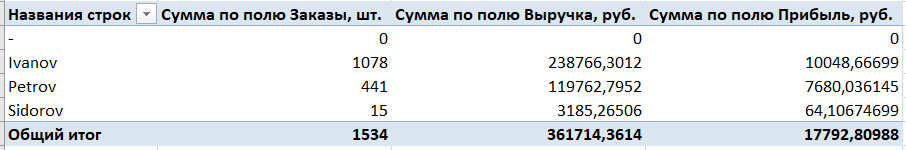

**Задание 2.** Исходные данные для выполнения задания представлены на листах «Задание 2», «Акция», «Себестоимость и цена до скидки» и «Справочник».

2.0 Импорт необходимых данных.


In [ ]:
df_list_test2 = pd.read_excel('Данные для задания Python.xlsx', sheet_name="Задание 2")
df_list_stock = pd.read_excel('Данные для задания Python.xlsx', sheet_name="Акция")

2.1. Подтянуть Цену до скидки и Необходимую скидку для участия в акции.

In [ ]:
stock = df_list_stock.set_index('Номенклатура')['Необходимая скидка для участия в акции, %']
df_list_test2['Необходимая скидка для участия в акции'] = df_list_test2['Необходимая скидка для участия в акции'].fillna(df_list_test2['Номенклатура'].map(stock))
df_list_test2

,Номенклатура,Модель продаж,Цена до скидки,Необходимая скидка для участия в акции,Цена после скидки,"Фиксированные затрат, руб./шт.","Налог, %","Комиссия,%","Рентабельность, %",Проверка
0,22740348,FBS,NaN,50.0,NaN,NaN,NaN,NaN,NaN,NaN
1,27708426,FBO,NaN,66.0,NaN,NaN,NaN,NaN,NaN,NaN
2,35217579,FBS,NaN,66.0,NaN,NaN,NaN,NaN,NaN,NaN
3,74417961,FBS,NaN,41.0,NaN,NaN,NaN,NaN,NaN,NaN
4,22740351,FBS,NaN,31.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
6618,222565821,FBO,NaN,67.0,NaN,NaN,NaN,NaN,NaN,NaN
6619,222574341,FBO,NaN,49.0,NaN,NaN,NaN,NaN,NaN,NaN
6620,222575259,FBS,NaN,56.0,NaN,NaN,NaN,NaN,NaN,NaN
6621,222564462,FBO,NaN,34.0,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_list_test2['Цена до скидки'] = 0
catalog = pd.merge(df_list_dir, df_list_price, how='left', on='Категория')
catalog = catalog[['Номенклатура','Базовая цена']]
df_list_test2 = pd.merge(df_list_test2, catalog, how='left', on='Номенклатура')
df_list_test2['Цена до скидки'] = df_list_test2['Базовая цена']
df_list_test2 = df_list_test2.drop(columns=['Базовая цена'], axis=1)
df_list_test2




,Номенклатура,Модель продаж,Цена до скидки,Необходимая скидка для участия в акции,Цена после скидки,"Фиксированные затрат, руб./шт.","Налог, %","Комиссия,%","Рентабельность, %",Проверка
0,22740348,FBS,499.0,50.0,NaN,NaN,NaN,NaN,NaN,NaN
1,27708426,FBO,499.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN
2,35217579,FBS,499.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN
3,74417961,FBS,499.0,41.0,NaN,NaN,NaN,NaN,NaN,NaN
4,22740351,FBS,499.0,31.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
6618,222565821,FBO,499.0,67.0,NaN,NaN,NaN,NaN,NaN,NaN
6619,222574341,FBO,499.0,49.0,NaN,NaN,NaN,NaN,NaN,NaN
6620,222575259,FBS,499.0,56.0,NaN,NaN,NaN,NaN,NaN,NaN
6621,222564462,FBO,499.0,34.0,NaN,NaN,NaN,NaN,NaN,NaN


2.2. Рассчитать цену после скидки.


In [ ]:
df_list_test2['Цена после скидки'] = df_list_test2['Цена до скидки']-(df_list_test2['Цена до скидки']*(df_list_test2['Необходимая скидка для участия в акции']/100))
df_list_test2

,Номенклатура,Модель продаж,Цена до скидки,Необходимая скидка для участия в акции,Цена после скидки,"Фиксированные затрат, руб./шт.","Налог, %","Комиссия,%","Рентабельность, %",Проверка
0,22740348,FBS,499.0,50.0,249.50,NaN,NaN,NaN,NaN,NaN
1,27708426,FBO,499.0,66.0,169.66,NaN,NaN,NaN,NaN,NaN
2,35217579,FBS,499.0,66.0,169.66,NaN,NaN,NaN,NaN,NaN
3,74417961,FBS,499.0,41.0,294.41,NaN,NaN,NaN,NaN,NaN
4,22740351,FBS,499.0,31.0,344.31,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
6618,222565821,FBO,499.0,67.0,164.67,NaN,NaN,NaN,NaN,NaN
6619,222574341,FBO,499.0,49.0,254.49,NaN,NaN,NaN,NaN,NaN
6620,222575259,FBS,499.0,56.0,219.56,NaN,NaN,NaN,NaN,NaN
6621,222564462,FBO,499.0,34.0,329.34,NaN,NaN,NaN,NaN,NaN


2.3. Подтянуть Фиксированные затраты.

In [ ]:
minSelfPrice = df_list_price['Фиксированные затраты, руб./шт.'].min()

catalog = pd.merge(df_list_dir, df_list_price, how='left', on='Категория')
catalog = catalog[['Номенклатура','Фиксированные затраты, руб./шт.']]
catalog['Фиксированные затраты, руб./шт.'] = np.where(pd.isna(catalog['Фиксированные затраты, руб./шт.']), minSelfPrice, catalog['Фиксированные затраты, руб./шт.'])
df_list_test2 = pd.merge(df_list_test2, catalog, how='left', on='Номенклатура')
df_list_test2['Фиксированные затрат, руб./шт.'] = df_list_test2['Фиксированные затраты, руб./шт.']
df_list_test2 = df_list_test2.drop(columns=['Фиксированные затраты, руб./шт.'], axis=1)
df_list_test2

,Номенклатура,Модель продаж,Цена до скидки,Необходимая скидка для участия в акции,Цена после скидки,"Фиксированные затрат, руб./шт.","Налог, %","Комиссия,%","Рентабельность, %",Проверка
0,22740348,FBS,499.0,50.0,249.50,153.4,NaN,NaN,NaN,NaN
1,27708426,FBO,499.0,66.0,169.66,153.4,NaN,NaN,NaN,NaN
2,35217579,FBS,499.0,66.0,169.66,153.4,NaN,NaN,NaN,NaN
3,74417961,FBS,499.0,41.0,294.41,153.4,NaN,NaN,NaN,NaN
4,22740351,FBS,499.0,31.0,344.31,153.4,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
6618,222565821,FBO,499.0,67.0,164.67,153.4,NaN,NaN,NaN,NaN
6619,222574341,FBO,499.0,49.0,254.49,153.4,NaN,NaN,NaN,NaN
6620,222575259,FBS,499.0,56.0,219.56,153.4,NaN,NaN,NaN,NaN
6621,222564462,FBO,499.0,34.0,329.34,153.4,NaN,NaN,NaN,NaN


2.4. Налоговую ставку задать как случайное целое число от 1 до 6%.

In [ ]:
df_list_test2['Налог, %'] = [random.randint(1, 6) for x in df_list_test2['Налог, %']]
df_list_test2

,Номенклатура,Модель продаж,Цена до скидки,Необходимая скидка для участия в акции,Цена после скидки,"Фиксированные затрат, руб./шт.","Налог, %","Комиссия,%","Рентабельность, %",Проверка
0,22740348,FBS,499.0,50.0,249.50,153.4,5,NaN,NaN,NaN
1,27708426,FBO,499.0,66.0,169.66,153.4,6,NaN,NaN,NaN
2,35217579,FBS,499.0,66.0,169.66,153.4,6,NaN,NaN,NaN
3,74417961,FBS,499.0,41.0,294.41,153.4,2,NaN,NaN,NaN
4,22740351,FBS,499.0,31.0,344.31,153.4,1,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
6618,222565821,FBO,499.0,67.0,164.67,153.4,1,NaN,NaN,NaN
6619,222574341,FBO,499.0,49.0,254.49,153.4,4,NaN,NaN,NaN
6620,222575259,FBS,499.0,56.0,219.56,153.4,2,NaN,NaN,NaN
6621,222564462,FBO,499.0,34.0,329.34,153.4,6,NaN,NaN,NaN


2.5. Указать комиссию в зависимости от модели продаж (FBS – 10%, FBO – 15%).

In [ ]:
df_list_test2['Комиссия,% '] = np.where(df_list_test2['Модель продаж']=='FBO', '15', '10')
df_list_test2['Комиссия,% '] = df_list_test2['Комиссия,% '].astype('int')
df_list_test2

,Номенклатура,Модель продаж,Цена до скидки,Необходимая скидка для участия в акции,Цена после скидки,"Фиксированные затрат, руб./шт.","Налог, %","Комиссия,%","Рентабельность, %",Проверка
0,22740348,FBS,499.0,50.0,249.50,153.4,5,10,NaN,NaN
1,27708426,FBO,499.0,66.0,169.66,153.4,6,15,NaN,NaN
2,35217579,FBS,499.0,66.0,169.66,153.4,6,10,NaN,NaN
3,74417961,FBS,499.0,41.0,294.41,153.4,2,10,NaN,NaN
4,22740351,FBS,499.0,31.0,344.31,153.4,1,10,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
6618,222565821,FBO,499.0,67.0,164.67,153.4,1,15,NaN,NaN
6619,222574341,FBO,499.0,49.0,254.49,153.4,4,15,NaN,NaN
6620,222575259,FBS,499.0,56.0,219.56,153.4,2,10,NaN,NaN
6621,222564462,FBO,499.0,34.0,329.34,153.4,6,15,NaN,NaN


2.6. Посчитать рентабельность.
Рентабельность = (Цена после скидки-Затраты на ед.)/Цена после скидки
Затраты на ед.=Фиксированные затраты+(Налог + Комиссия)*Цена после скидки.

In [ ]:
#Если значений по цене нет, приравниваем рентабельность к 0, проверка ниже будет равна False.
df_list_test2['Затраты на ед'] = df_list_test2['Фиксированные затрат, руб./шт.']+((df_list_test2['Налог, %']+df_list_test2['Комиссия,% '])/100)*df_list_test2['Цена после скидки']
df_list_test2['Рентабельность, %'] = np.where(pd.isna(df_list_test2['Цена после скидки']), 0, (df_list_test2['Цена после скидки']-df_list_test2['Затраты на ед'])/df_list_test2['Цена после скидки']*100)
df_list_test2=df_list_test2.drop(columns=['Затраты на ед'], axis=1)
df_list_test2

,Номенклатура,Модель продаж,Цена до скидки,Необходимая скидка для участия в акции,Цена после скидки,"Фиксированные затрат, руб./шт.","Налог, %","Комиссия,%","Рентабельность, %",Проверка
0,22740348,FBS,499.0,50.0,249.50,153.4,5,10,23.517034,NaN
1,27708426,FBO,499.0,66.0,169.66,153.4,6,15,-11.416126,NaN
2,35217579,FBS,499.0,66.0,169.66,153.4,6,10,-6.416126,NaN
3,74417961,FBS,499.0,41.0,294.41,153.4,2,10,35.895792,NaN
4,22740351,FBS,499.0,31.0,344.31,153.4,1,10,44.447126,NaN
...,...,...,...,...,...,...,...,...,...,...
6618,222565821,FBO,499.0,67.0,164.67,153.4,1,15,-9.156009,NaN
6619,222574341,FBO,499.0,49.0,254.49,153.4,4,15,20.722582,NaN
6620,222575259,FBS,499.0,56.0,219.56,153.4,2,10,18.132993,NaN
6621,222564462,FBO,499.0,34.0,329.34,153.4,6,15,32.421996,NaN


2.7. Если рентабельность меньше 10%, то в столбце Проверка выводим False, иначе
True.

In [ ]:
df_list_test2['Проверка']=df_list_test2['Проверка'].astype('str')
df_list_test2['Проверка'] = np.where(df_list_test2['Рентабельность, %']<10, 'False', 'True')
df_list_test2


,Номенклатура,Модель продаж,Цена до скидки,Необходимая скидка для участия в акции,Цена после скидки,"Фиксированные затрат, руб./шт.","Налог, %","Комиссия,%","Рентабельность, %",Проверка
0,22740348,FBS,499.0,50.0,249.50,153.4,5,10,23.517034,True
1,27708426,FBO,499.0,66.0,169.66,153.4,6,15,-11.416126,False
2,35217579,FBS,499.0,66.0,169.66,153.4,6,10,-6.416126,False
3,74417961,FBS,499.0,41.0,294.41,153.4,2,10,35.895792,True
4,22740351,FBS,499.0,31.0,344.31,153.4,1,10,44.447126,True
...,...,...,...,...,...,...,...,...,...,...
6618,222565821,FBO,499.0,67.0,164.67,153.4,1,15,-9.156009,False
6619,222574341,FBO,499.0,49.0,254.49,153.4,4,15,20.722582,True
6620,222575259,FBS,499.0,56.0,219.56,153.4,2,10,18.132993,True
6621,222564462,FBO,499.0,34.0,329.34,153.4,6,15,32.421996,True


2.8. Привести к нужным типам данных:
Цена до скидки, Необходимая цена для участия в акции, Цена после скидки – целые; Фиксированные затраты, Налог, Комиссия, Рентабельность – числа с плавающей запятой; Проверка – строка.

In [ ]:
df_list_test2 = df_list_test2.fillna(0)

df_list_test2['Цена до скидки']=df_list_test2['Цена до скидки'].astype('int')
df_list_test2['Необходимая скидка для участия в акции']=df_list_test2['Необходимая скидка для участия в акции'].astype('int')
df_list_test2['Цена после скидки']=df_list_test2['Цена после скидки'].astype('int')
df_list_test2['Фиксированные затрат, руб./шт.']=df_list_test2['Фиксированные затрат, руб./шт.'].astype('float')
df_list_test2['Налог, %']=df_list_test2['Налог, %'].astype('float')
df_list_test2['Комиссия,% ']=df_list_test2['Комиссия,% '].astype('float')
df_list_test2['Рентабельность, %']=df_list_test2['Рентабельность, %'].astype('float')
df_list_test2['Проверка']=df_list_test2['Проверка'].astype('str')
df_list_test2.dtypes

,0
Номенклатура,int64
Модель продаж,object
Цена до скидки,int64
Необходимая скидка для участия в акции,int64
Цена после скидки,int64
"Фиксированные затрат, руб./шт.",float64
"Налог, %",float64
"Комиссия,%",float64
"Рентабельность, %",float64
Проверка,object


2.9. Экспорт итоговой таблицы в формате xlsx, название файла «Задание 2».

In [ ]:
file_name = 'Задание 2.xlsx'

with pd.ExcelWriter(file_name) as writer:
    df_list_test2.to_excel(writer, sheet_name='Таблица', index=False)